In [1]:
#importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the file
df = pd.read_csv('day.csv')

#exploring top 5 rows of df dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Checking shape
df.shape

(730, 16)

In [5]:
#checking description of df data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


-----------

### Converting required variables into categorical variables

In [6]:
#converting weathersit into categorical string
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain' })

#converting season into categorical string
df['season']= df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#converting weekdays into categorical string
df['weekday'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

#converting yr into categorical string
df['yr']= df['yr'].map({0:'2018', 1:'2019'})

#converting month into categorical string
df['mnth']= df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'July', 8:'Aug',
                           9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

## Data Visualisation

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

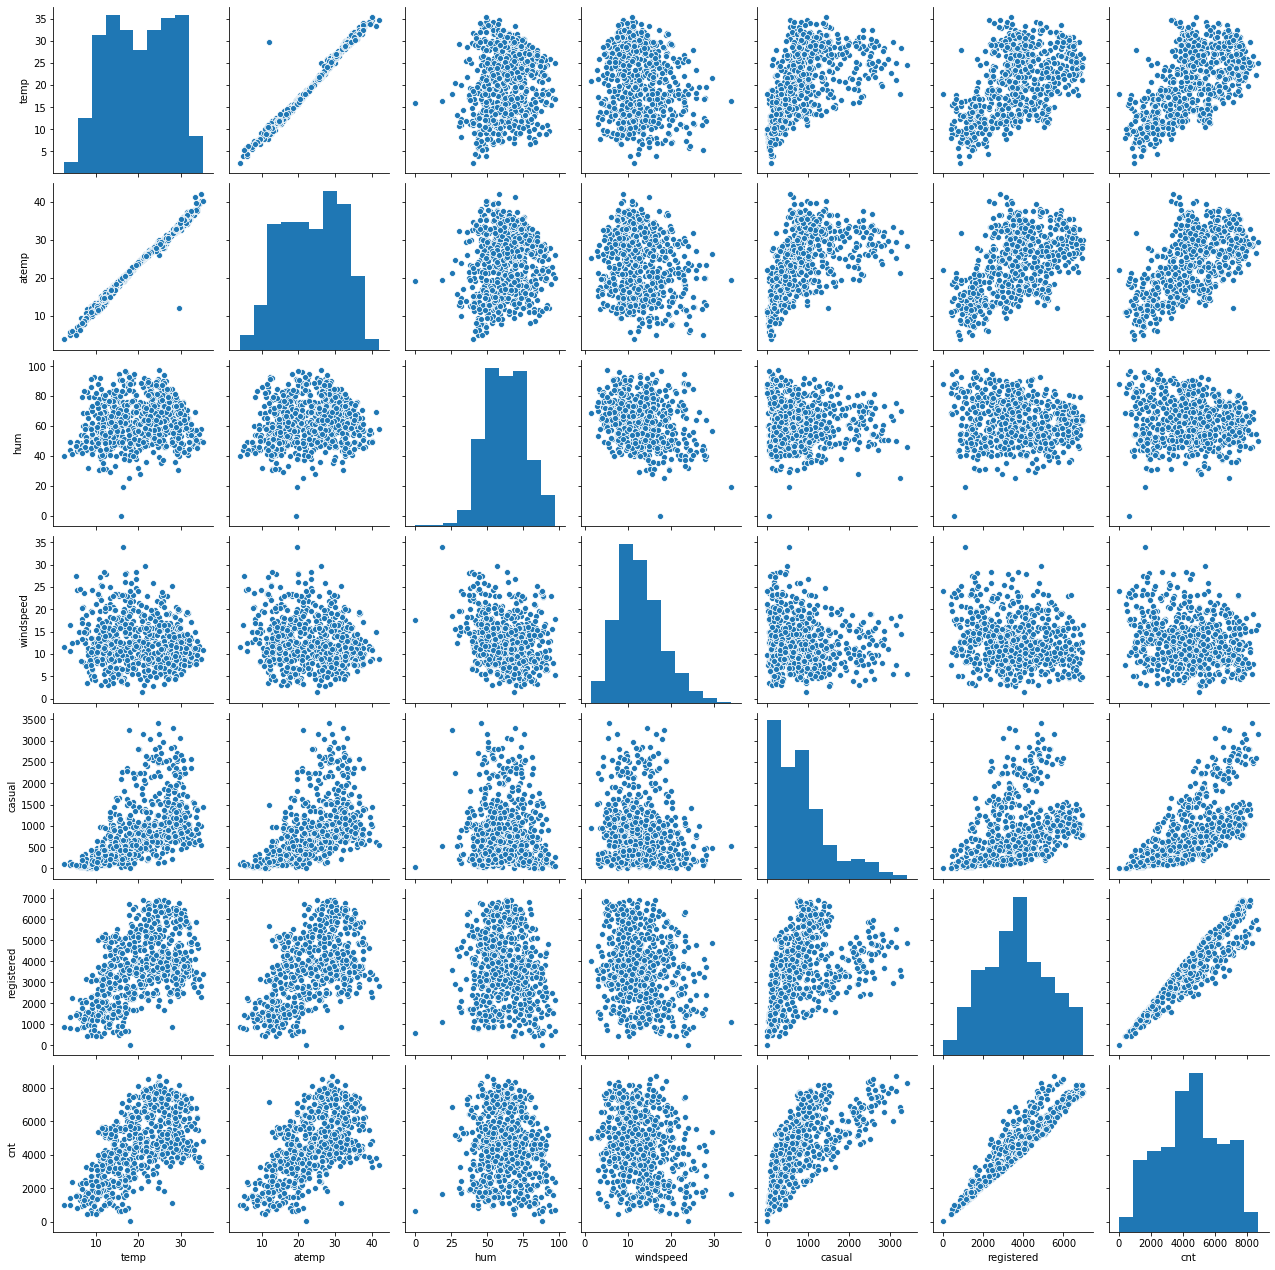

In [7]:
#ploting pairplot of all numerical varibles
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

In [8]:
#checking correlation between numerical variables
df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


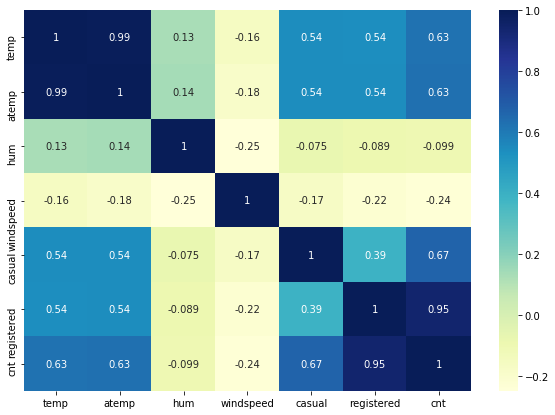

In [9]:
#ploting heatmap
heat_map = df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(heat_map,annot=True,cmap='YlGnBu')
plt.show()

As we can see that `temp` and `atemp` have high correlation so we will remove `atem`. Even `registered` and `cnt` are have high correlation as compared  to `casual` and `cnt`. So we will remove both `registered` and `casual`.

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

Our target variable is `cnt`

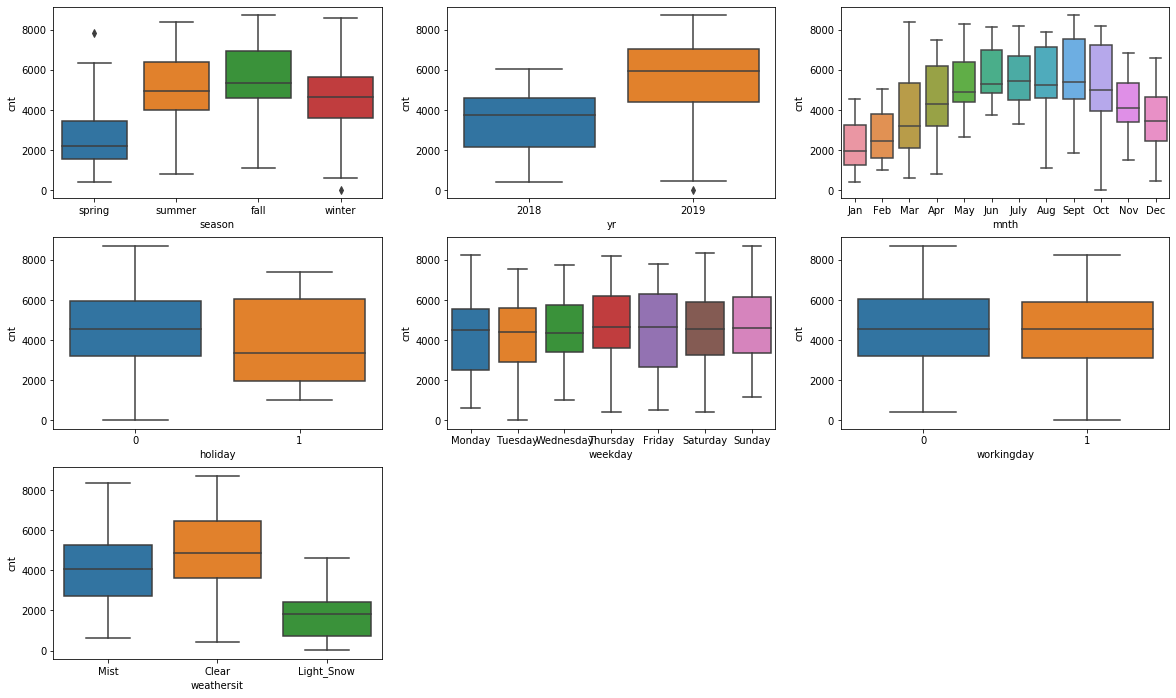

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

- 'fall' season have the highest number of total rental bikes as compared to other seasons
- Total count has increased in 2019 from previous year 2018
- weekday i.e day of the week dosn't have much effect on total rental bikes
- workingday i.e if day is neither weekend nor holiday is 1, otherwise 0 remains almost same for total renatal bikes
- weathersit 'Clear' have the highest total rental bikes which means that people prefer to rent a bike when the weather is 
  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

-----------------

## Data Preparation

In [11]:
#Checking Data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Droping variables
df = df.drop(['instant','dteday','holiday','atemp','casual','registered'],axis=1)

In [13]:
#checking top 5 rows
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
#converting weekday and weekday into objects since they are categorical variables
df['weekday'] = df['weekday'].astype('object')
df['workingday'] = df['workingday'].astype('object')

In [15]:
#creating dummy variables for all categorical variable
seas = pd.get_dummies(df['season'],drop_first=True,prefix='season')

year = pd.get_dummies(df['yr'],drop_first=True,prefix='yr')

month = pd.get_dummies(df['mnth'],drop_first=True,prefix='mnth')

wekday = pd.get_dummies(df['weekday'],drop_first=True,prefix='weekday')

workday = pd.get_dummies(df['workingday'],drop_first=True,prefix='workingday')

weaths = pd.get_dummies(df['weathersit'],drop_first=True,prefix='weathersit')

In [16]:
#Adding these results in original dataset df
df= pd.concat([df,seas,year,month,wekday,workday,weaths],axis=1)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Light_Snow,weathersit_Mist
0,spring,2018,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985,...,0,1,0,0,0,0,0,1,0,1
1,spring,2018,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,1,0,1,0,1
2,spring,2018,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,1,1,0,0
3,spring,2018,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#Now we can drop season column and weathersit column and others from dataset as we have created dummy varibales
df = df.drop(['season','yr','mnth','weekday','workingday','weathersit'],axis=1)
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Light_Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


-------

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [18]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df,train_size=0.7, test_size=0.3,random_state=100)

In [19]:
#checking shape of both df_train and df_test dataset
print('df_train:', df_train.shape)
print('df_test:', df_test.shape)

df_train: (510, 28)
df_test: (219, 28)


### Rescaling the Features

Here we can see that some columns have large integral values, rest of the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 and 1
2. Standardisation 

We will use MinMax scaling.

In [20]:
#1. Instantiate an object
scaler = MinMaxScaler()

#creat a list of numeric  variables
# Apply scaler() to all the columns except on 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

#2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Light_Snow,weathersit_Mist
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


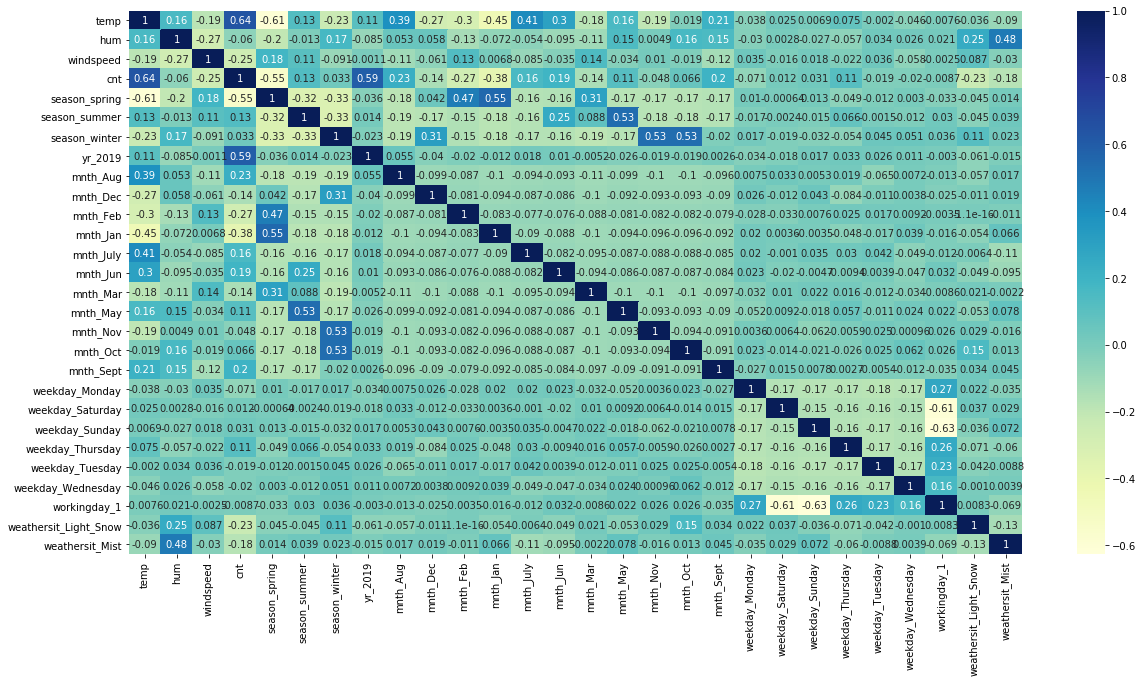

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True)
plt.show()

- We can see that `cnt` have a highest correlation with `temp` of 0.64. 
- 2nd highest correlation can be seen between `cnt` and `yr_2019` of 0.59.
- 3rd highest correlation can be seen between `season_spring` and `mnth_jan` of 0.55.

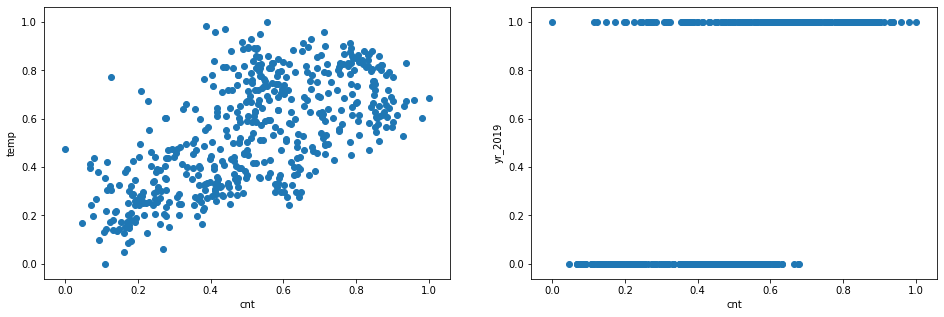

In [23]:
# scatter plot between cnt and temp, cnt and yr_2019
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.scatter(df_train.cnt,df_train.temp)
plt.xlabel('cnt')
plt.ylabel('temp')
plt.subplot(1,2,2)
plt.scatter(df_train.cnt,df_train.yr_2019)
plt.xlabel('cnt')
plt.ylabel('yr_2019')
plt.show()

### Dividing into X and Y sets for the model building


In [24]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train 

In [25]:
#checking shape of both X_train and y_train dataset
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (510, 27)
y_train: (510,)
